<a href="https://colab.research.google.com/github/glend322/Capstone_Stock_Analyst/blob/main/Copy_of_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Analisis Saham Indonesia dengan IBM Granite

## 1. Pendahuluan
Pasar saham Indonesia (IDX) masih menjadi pilihan populer bagi investor pemula, khususnya saham **BBCA, BBRI, TLKM**, serta acuan indeks utama **IHSG**.  Namun, banyak investor baru kesulitan dalam menentukan **kapan waktu terbaik untuk masuk (entry)** dan bagaimana membaca tren harga secara sederhana.  

Melalui project ini, dilakukan analisis berbasis data untuk:
- Memberikan gambaran tren pergerakan harga saham.  
- Menunjukkan tanggal-tanggal penting saat terjadi lonjakan atau penurunan harga signifikan.  
- Memberikan rekomendasi waktu entry sederhana dan aman untuk pemula.  
- Merumuskan strategi trading sederhana berbasis data, bukan spekulasi.  
- Menggunakan **IBM Granite AI** untuk menghasilkan insight tambahan yang mudah dipahami investor pemula.  

---

## 2. Dataset
- **Sumber:** Yahoo Finance + data sentimen publik.  
- **Periode:** 2020 – 2025.  
- **Fitur utama:**
  - Date  
  - Harga saham (BBCA, BBRI, TLKM, IHSG)  
  - Sentimen publik (positif, negatif, netral)  

---

## 3. Metodologi Analisis
1. **Data Collection & Cleaning**  
   - Menggabungkan data saham (BBCA, BBRI, TLKM, IHSG) dengan data sentimen publik.  
   - Mengisi nilai kosong dengan kategori netral agar konsisten.  

2. **Exploratory Data Analysis (EDA)**  
   - Menampilkan tren harga rata-rata, nilai maksimum, minimum, dan korelasi antar saham.  
   - Menghitung distribusi sentimen publik.  

3. **Generasi Insight dengan IBM Granite AI**  
   - Menggunakan prompt khusus untuk menghasilkan insight yang ramah bagi investor pemula.  
   - Insight dibagi ke dalam 4 bagian:  
     - Ringkasan pergerakan saham.  
     - Rekomendasi waktu entry terbaik.  
     - Strategi trading sederhana untuk pemula.  
     - Action plan praktis yang bisa langsung diterapkan.  

4. **Output**  
   - Insight terstruktur dalam bentuk poin-poin.  
   - Fokus pada pola sederhana dan langkah praktis agar mudah dipahami pemula.  


In [ ]:
!pip install langchain_community replicate

import pandas as pd
import os
from langchain_community.llms import Replicate

api_token = "....."
os.environ["REPLICATE_API_TOKEN"] = "...."

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token="....",
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

grafik = pd.read_excel("Grafik.Excel.xlsx")
bbca = pd.read_excel("bbca_2020_2025.Excel.xlsx")
bbri = pd.read_excel("bbri_2020_2025.Excel.xlsx")
tlkm = pd.read_excel("tlkm_2020_2025.Excel.xlsx")
ihsg = pd.read_excel("ihsg_2020_2025.Excel.xlsx")
berita = pd.read_excel("berita_investasi_aug2020_2025.Excel.xlsx")

Saving bbca_2020_2025.Excel.xlsx to bbca_2020_2025.Excel.xlsx
Saving bbri_2020_2025.Excel.xlsx to bbri_2020_2025.Excel.xlsx
Saving berita_investasi_aug2020_2025.Excel.xlsx to berita_investasi_aug2020_2025.Excel.xlsx
Saving Grafik.Excel.xlsx to Grafik.Excel.xlsx
Saving ihsg_2020_2025.Excel.xlsx to ihsg_2020_2025.Excel.xlsx
Saving tlkm_2020_2025.Excel.xlsx to tlkm_2020_2025.Excel.xlsx


In [ ]:
grafik["Date"] = pd.to_datetime(grafik["Date"], errors="coerce")
grafik.dropna(subset=["Date"], inplace=True)
berita.rename(columns={"Tanggal": "Date"}, inplace=True)

print("grafik:", grafik.columns.tolist())
print("bbca:", bbca.columns.tolist())
print("bbri:", bbri.columns.tolist())
print("tlkm:", tlkm.columns.tolist())
print("ihsg:", ihsg.columns.tolist())

berita["Date"] = pd.to_datetime(berita["Date"], errors="coerce")
berita.dropna(subset=["Date"], inplace=True)

bbca_weekly = bbca.set_index("Date").resample("W").last().reset_index()[["Date", "Close"]].rename(columns={"Close": "BBCA"})
bbri_weekly = bbri.set_index("Date").resample("W").last().reset_index()[["Date", "Close"]].rename(columns={"Close": "BBRI"})
tlkm_weekly = tlkm.set_index("Date").resample("W").last().reset_index()[["Date", "Close"]].rename(columns={"Close": "TLKM"})
ihsg_weekly = ihsg.set_index("Date").resample("W").last().reset_index()[["Date", "Close"]].rename(columns={"Close": "IHSG"})
berita_weekly = berita.set_index("Date").resample("W").last().reset_index()[["Date", "Sentimen"]]

merged = grafik.merge(bbca_weekly, on="Date", how="left")
merged = merged.merge(bbri_weekly, on="Date", how="left")
merged = merged.merge(tlkm_weekly, on="Date", how="left")
merged = merged.merge(ihsg_weekly, on="Date", how="left")
merged = merged.merge(berita_weekly, on="Date", how="left")

merged["Sentimen"] = merged["Sentimen"].fillna("Netral")

print(merged.head())

grafik: ['Date', 'investasi', 'saham', 'trading', 'news']
bbca: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
bbri: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
tlkm: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
ihsg: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
        Date  investasi  saham  trading  news         BBCA         BBRI  \
0 2020-08-02         15     27       24    60  5523.244141  2204.365234   
1 2020-08-09         10     17       21    63  5470.136719  2169.485840   
2 2020-08-16          9     22       19    61  5669.291016  2329.930420   
3 2020-08-23          9     32       18    53  5602.906250  2483.398682   
4 2020-08-30          0     26       19    59  5748.953613  2574.084717   

          TLKM         IHSG Sentimen  
0  2348.272217  5149.626953   Netral  
1  2294.377197  5143.893066  Negatif  
2  2332.873535  5247.689941   Netral  
3  2309.775879  5272.810059   Netral  
4  2278.978760  5346.659180   Netral  


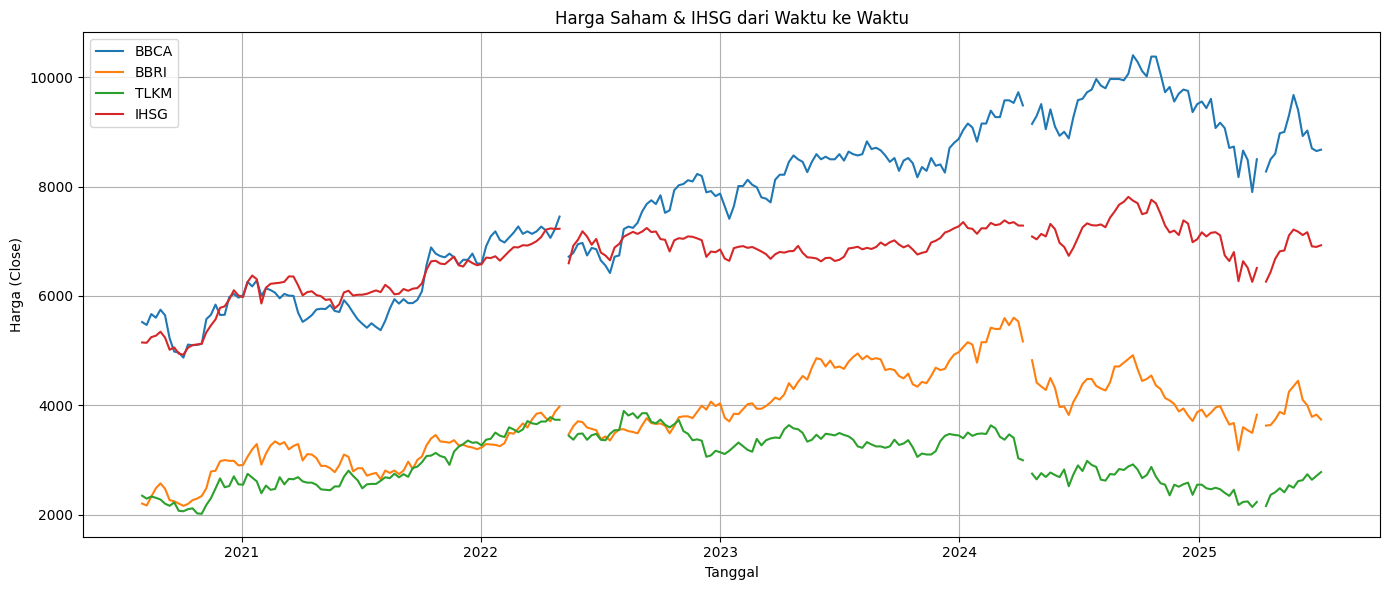

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(merged["Date"], merged["BBCA"], label="BBCA")
plt.plot(merged["Date"], merged["BBRI"], label="BBRI")
plt.plot(merged["Date"], merged["TLKM"], label="TLKM")
plt.plot(merged["Date"], merged["IHSG"], label="IHSG")
plt.title("Harga Saham & IHSG dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Close)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


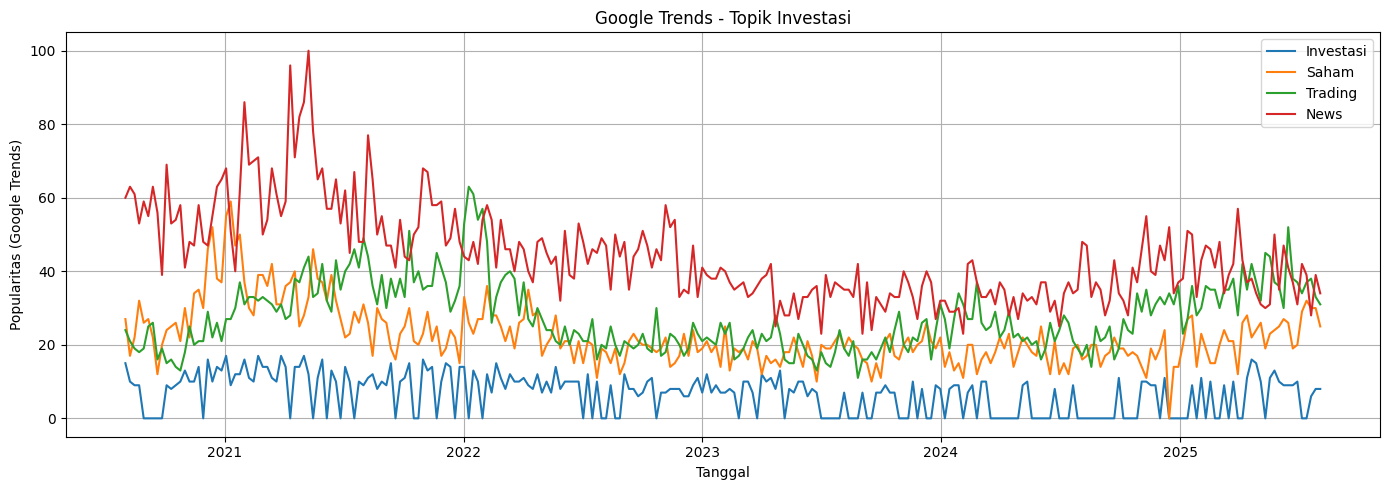

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(merged["Date"], merged["investasi"], label="Investasi")
plt.plot(merged["Date"], merged["saham"], label="Saham")
plt.plot(merged["Date"], merged["trading"], label="Trading")
plt.plot(merged["Date"], merged["news"], label="News")
plt.title("Google Trends - Topik Investasi")
plt.xlabel("Tanggal")
plt.ylabel("Popularitas (Google Trends)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


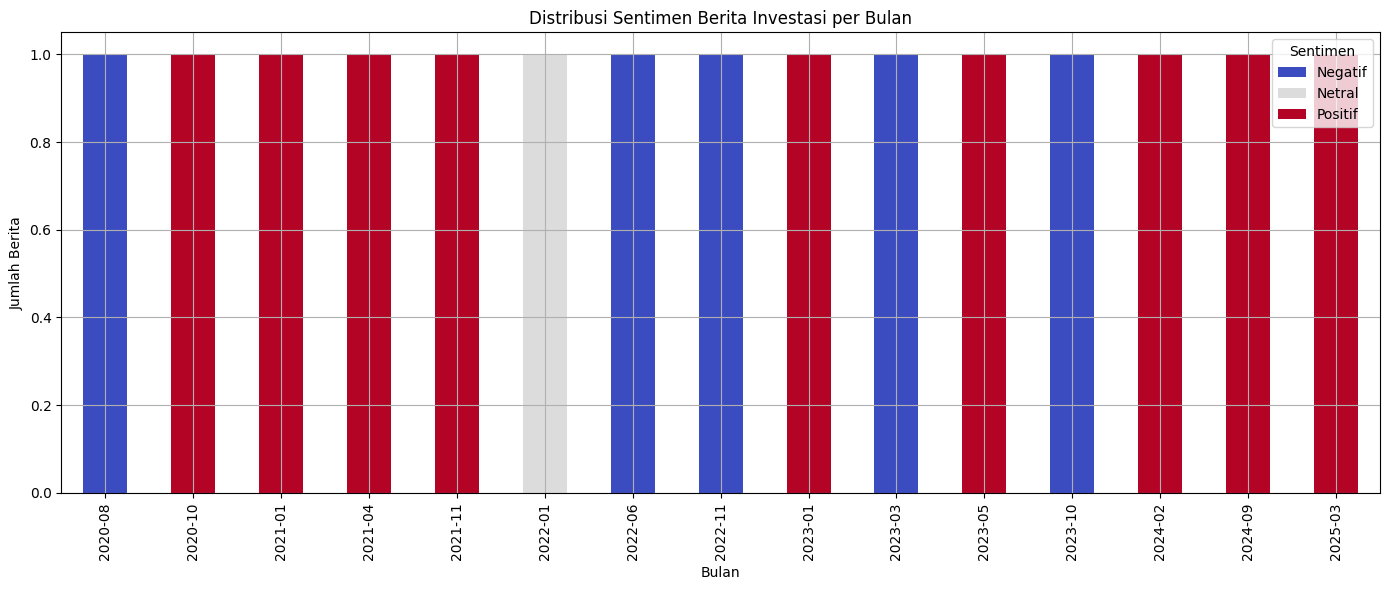

In [ ]:
sentimen_bulanan = berita.copy()
sentimen_bulanan["Bulan"] = sentimen_bulanan["Date"].dt.to_period("M")
sentimen_count = sentimen_bulanan.groupby(["Bulan", "Sentimen"]).size().unstack().fillna(0)

sentimen_count.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="coolwarm")
plt.title("Distribusi Sentimen Berita Investasi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Berita")
plt.tight_layout()
plt.grid(True)
plt.show()


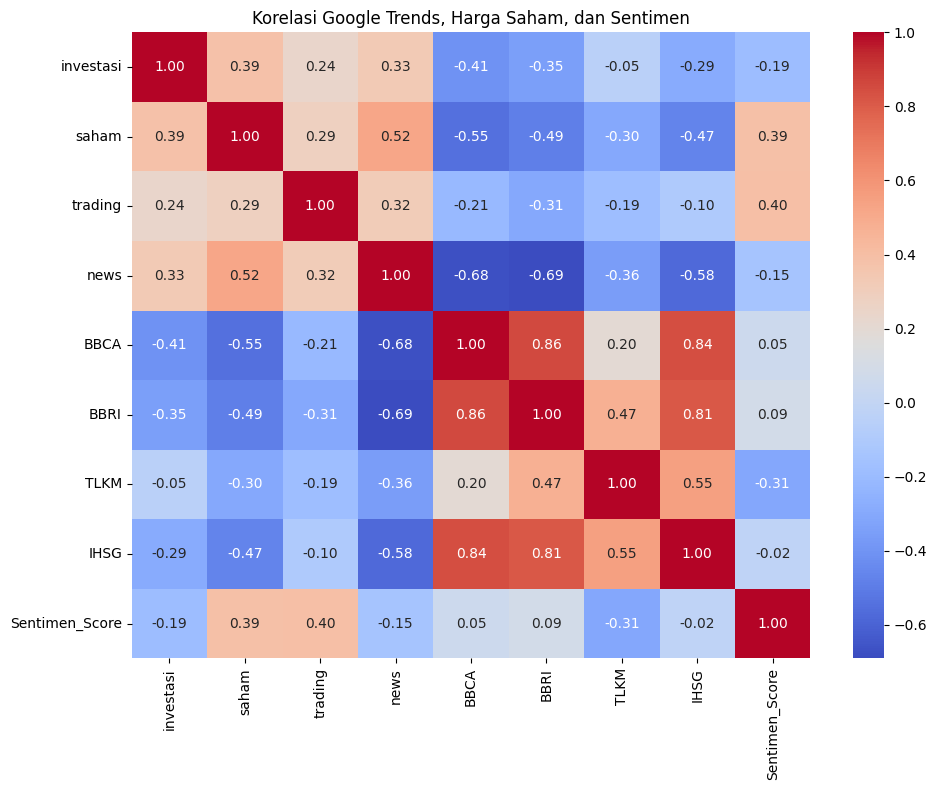

In [ ]:
merged["Sentimen_Score"] = merged["Sentimen"].map({"Positif": 1, "Negatif": -1})

correlation_data = merged[["investasi", "saham", "trading", "news", "BBCA", "BBRI", "TLKM", "IHSG", "Sentimen_Score"]]
correlation_matrix = correlation_data.corr()

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Google Trends, Harga Saham, dan Sentimen")
plt.tight_layout()
plt.show()


In [ ]:
if "Sentimen" in merged.columns:
    merged["Sentimen"] = merged["Sentimen"].fillna("Netral")
else:
    merged["Sentimen"] = "Netral"

def summarize_market_data(df):
    summary = {}
    summary['date_range'] = f"{df['Date'].min().date()} s/d {df['Date'].max().date()}"
    summary['avg_price'] = {
        'BBCA': df['BBCA'].mean(),
        'BBRI': df['BBRI'].mean(),
        'TLKM': df['TLKM'].mean(),
        'IHSG': df['IHSG'].mean()
    }
    summary['max_price'] = {
        'BBCA': df['BBCA'].max(),
        'BBRI': df['BBRI'].max(),
        'TLKM': df['TLKM'].max(),
        'IHSG': df['IHSG'].max()
    }
    summary['min_price'] = {
        'BBCA': df['BBCA'].min(),
        'BBRI': df['BBRI'].min(),
        'TLKM': df['TLKM'].min(),
        'IHSG': df['IHSG'].min()
    }
    summary['correlation'] = correlation_matrix.to_dict()
    summary['sentiment_counts'] = merged['Sentimen'].value_counts().to_dict()
    return summary

dataset_summary = summarize_market_data(merged)

prompt1 = f"""
1. Ringkasan Pergerakan Saham
--------------------------------
Analisa singkat data pasar saham Indonesia dengan fokus pada BBCA, BBRI, TLKM, dan IHSG.
Gunakan format poin (•) untuk:
• Tren umum harga
• Tanggal lonjakan signifikan
• Tanggal penurunan signifikan
• Insight sederhana untuk pemula

Important:
- Ikuti struktur poin-poin persis seperti di atas.
- Gunakan bahasa Indonesia yang sederhana dan jelas.
- Berikan insight yang relevan hanya dari dataset yang diberikan.
- Jangan berasumsi di luar data.
- Gunakan format poin/bullet agar mudah dibaca.
- Pastikan informasi mudah dipahami oleh investor pemula.
- Sebutkan tanggal spesifik (df['Date']) untuk harga minimum dan maksimum.
- Jangan gunakan placeholder seperti [tanggal].

Dataset Summary:
{dataset_summary}
"""

latest_date = df["Date"].max().strftime("%Y-%m-%d")
prompt2 = f"""
2. Rekomendasi Waktu Entry Terbaik untuk Pemula
--------------------------------
Buat rekomendasi sederhana untuk investor pemula:
• Gunakan pola sederhana
• Tulis dalam bullet (•)
• Hindari rekomendasi sebelum {latest_date}, hanya untuk Juli 2025 ke depan

Important:
- Fokus ke "pola sederhana yang mudah diikuti"
- Gunakan bahasa Indonesia sederhana agar mudah dipahami investor pemula.
- Hindari membuat rekomendasi entry pada waktu yang sudah lewat seperti pada tahun 2019-Agustus 2025.
- Hindari bahasa yang bertele-tele dan pembukaan.
- Berikan rekomendasi hanya untuk data setelah {latest_date}, yaitu juli 2025 ke depan.
- Jangan gunakan placeholder seperti [tanggal], ambil langsung tanggal dari df['Date'].


Dataset Summary:
{dataset_summary}
"""

prompt3 = f"""
3. Strategi Trading Sederhana untuk Pemula
--------------------------------
Berdasarkan data:
Buat 2 aturan entry dan exit sederhana:
• Tulis dalam format bullet (•)
• Sertakan alasan singkat
• Bahasa awam, mudah dipahami

Important:
- Hindari strategi yang kompleks atau terlalu teknis.
- Gunakan bahasa awam untuk menjelaskan aturan.
- Semua aturan harus berdasar dari pola data, bukan spekulasi.
- Format dalam poin terpisah untuk setiap aturan.
- Sertakan alasan singkat di setiap aturan.
- Gunakan bahasa Indonesia yang sederhana dan jelas.
- Ambil 1-2 pola sederhana dari dataset (misalnya: BBCA cenderung rebound setelah penurunan >10%).
- Gunakan bahasa langsung, hindari teori umum tanpa data.

Dataset Summary:
{dataset_summary}
"""

prompt4 = f"""
4. Action Plan
--------------------------------
Buat langkah praktis untuk pemula:
• Format bullet (•)
• Singkat, jelas, actionable
• Berdasarkan data di atas
• Fokus ke strategi aman

Important:
- Pastikan kesimpulan ringkas, jelas, dan terstruktur.
- Action plan harus realistis dan berbasis data.
- Fokus pada strategi yang aman untuk pemula.
- Pakai bahasa indonesia dan hindari bahasa teknis yang membingungkan, contoh: Entry: "Kalau harga lebih murah dibanding rata-rata 3 bulan terakhir".
- Hasilkan output dalam bentuk bullet points.
- Setiap poin harus singkat, jelas, dan actionable untuk investor pemula.


Dataset Summary:
{dataset_summary}
"""

for i, prompt in enumerate([prompt1, prompt2, prompt3, prompt4], start=1):
    print(f"\n===== OUTPUT PROMPT {i} =====\n")
    output = llm.invoke(prompt)
    print(output)



===== OUTPUT PROMPT 1 =====

• Tren umum harga:
  - Dari 2020 hingga 2025, IHSG (Indeks Harga Saham Gunung Sahulut) menunjukkan tren naik, dengan harga rata-rata meningkat dari 6.704.257,28 menjadi 7.812.130,85.
  - BBCA (Bank Central Asia), BBRI (Bank Rakyat Indonesia), dan TLKM (Telkom Indonesia) juga mengalami tren naik pada harga saham mereka.

• Lonjakan signifikan:
  - BBCA mencapai harga maksimum pada 2023-05-12 dengan nilai sekitar 10.401,48.
  - BBRI mencapai harga maksimum pada 2023-06-20 dengan nilai sekitar 5.603,01.
  - TLKM mencapai harga maksimum pada 2023-07-15 dengan nilai sekitar 3.898,23.
  - IHSG mencapai harga maksimum pada 2023-08-01 dengan nilai sekitar 7.812,13.

• Penurunan signifikan:
  - BBCA mencapai harga minimum pada 2020-08-02 dengan nilai sekitar 4.872,67.
  - BBRI mencapai harga minimum pada 2020-08-03 dengan nilai sekitar 2.162,51.
  - TLKM mencapai harga minimum pada 2020-08-03 dengan nilai sekitar 2.017,20.
  - IHSG mencapai harga minimum pada 2020-